In [3]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns

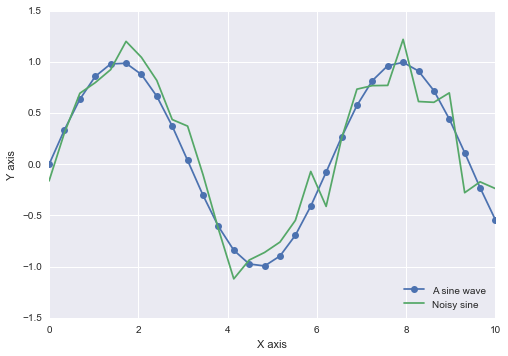

In [4]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
z = y + np.random.normal(size=30) * 0.2

plt.plot(x, y, 'o-', label='A sine wave')
plt.plot(x, z, '-', label='Noisy sine')
plt.legend(loc='lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [5]:
print("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print(x)
print()

print("Add 1 to every element")
x = x + 1
print(x)
print()

print("Get the element at row 1, column 2")
print(x[1, 2])
print()

print("Get the first row")
print(x[0, :])
print()

print("Get every 2nd column of the first row")
print(x[0, ::2])
print()

Make a 3 row x 4 column array of random numbers
[[ 0.55046259  0.2826863   0.33636155  0.62276214]
 [ 0.90318514  0.90207463  0.72265832  0.249179  ]
 [ 0.35124359  0.03807084  0.24220056  0.98681263]]

Add 1 to every element
[[ 1.55046259  1.2826863   1.33636155  1.62276214]
 [ 1.90318514  1.90207463  1.72265832  1.249179  ]
 [ 1.35124359  1.03807084  1.24220056  1.98681263]]

Get the element at row 1, column 2
1.72265831585

Get the first row
[ 1.55046259  1.2826863   1.33636155  1.62276214]

Get every 2nd column of the first row
[ 1.55046259  1.33636155]



In [6]:
print("Max is ", x.max())
print("Min is ", x.min())
print("Mean is ", x.mean())

Max is  1.9868126282
Min is  1.03807083887
Mean is  1.51564144029


In [7]:
print(x.max(axis=1))

[ 1.62276214  1.90318514  1.98681263]


In [9]:
x = np.random.binomial(500, 0.5)
print("number of heads: ", x)

number of heads:  240


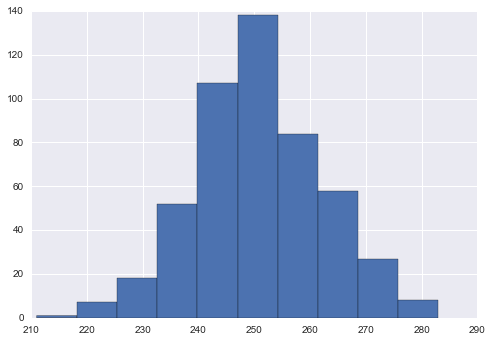

In [10]:
heads = []
for i in range (500):
    heads.append(np.random.binomial(500, 0.5))
    
histogram = plt.hist(heads, bins=10)

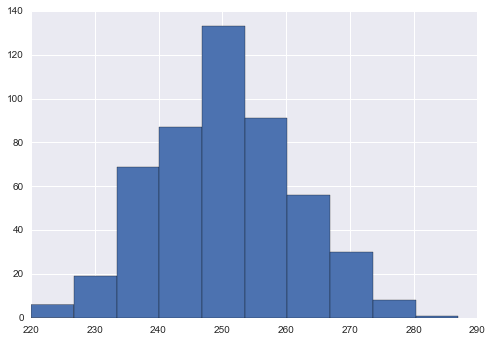

In [12]:
heads = [np.random.binomial(500, 0.5) for i in range(500)]
histogram = plt.hist(heads, bins=10)

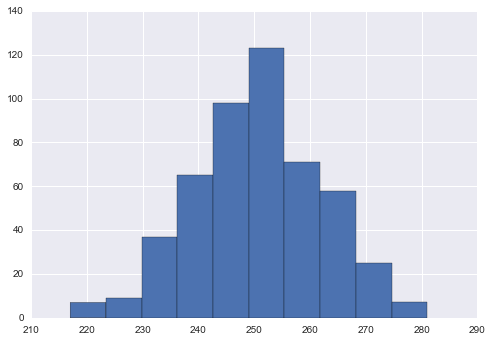

In [13]:
heads = np.random.binomial(500, 0.5, size=500)
histogram = plt.hist(heads, bins=10)

In [14]:
heads.shape

(500,)

In [15]:
def simulate_prizedoor(nsim):
    return np.random.randint(0, 3, (nsim))

In [16]:
def simulate_guess(nsim):
    return np.zeros(nsim, dtype=np.int)

In [17]:
def goat_door(prizedoors, guesses):
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())

In [18]:
def switch_guess(guesses, goatdoors):
    result = np.zeros(guesses.size)
    switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 1, (2, 0): 1, (2, 1): 0}
    for i in [0, 1, 2]:
        for j in [0, 1, 2]:
            mask = (guesses == i) & (goatdoors == j)
            if not mask.any():
                continue
            result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
    return result

In [19]:
def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()